# Re-analyses no gpl in df - correct way

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 20)
df1 = pd.read_csv('/home/local/USHERBROOKE/frog2901/Documents/R_test/HS_df_chipseq_to_work_no_gpl.csv', sep=',')



/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
0,GSE10437,Expression profiling by array,Dynamic regulation of nucleosome positioning i...,The positioning of nucleosomes with respect to...,Gene expression data from resting (M0 and T0)...,Public on Feb 09 2008,18329373.0,GSM263933,CD4+ Tcell Resting M0,RNA,GPL570,Homo sapiens,GSE10437,"Human CD4+ T cells, resting",Human CD4+ T cells,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM263n...,NaN
1,GSE10437,Expression profiling by array,Dynamic regulation of nucleosome positioning i...,The positioning of nucleosomes with respect to...,Gene expression data from resting (M0 and T0)...,Public on Feb 09 2008,18329373.0,GSM263934,CD4+ Tcell Resting T0,RNA,GPL570,Homo sapiens,GSE10437,"Human CD4+ T cells, resting",Human CD4+ T cells,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM263n...,NaN
2,GSE10437,Expression profiling by array,Dynamic regulation of nucleosome positioning i...,The positioning of nucleosomes with respect to...,Gene expression data from resting (M0 and T0)...,Public on Feb 09 2008,18329373.0,GSM263935,CD4+ Tcell Activated M18,RNA,GPL570,Homo sapiens,GSE10437,"Human CD4+ T cells, activated using anti-CD3/2...",Human CD4+ T cells,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM263n...,NaN
3,GSE10437,Expression profiling by array,Dynamic regulation of nucleosome positioning i...,The positioning of nucleosomes with respect to...,Gene expression data from resting (M0 and T0)...,Public on Feb 09 2008,18329373.0,GSM263936,CD4+ Tcell Activated T18,RNA,GPL570,Homo sapiens,GSE10437,"Human CD4+ T cells, activated using anti-CD3/2...",Human CD4+ T cells,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM263n...,NaN
4,GSE11892,Expression profiling by array;\tExpression pro...,A Global View of Gene Activity and Alternative...,Transcriptome of HEK and B cells were analyzed...,"For HEK and B cell, samples were hybridized as...",Public on Jul 03 2008,18599741.0,GSM300493,Transcriptome of HEK293T cells,RNA,GPL6104,Homo sapiens,GSE11892,HEK293T cells,Human embryonic kidney (HEK293T) cells,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM300n...,NaN
5,GSE11892,Expression profiling by array;\tExpression pro...,A Global View of Gene Activity and Alternative...,Transcriptome of HEK and B cells were analyzed...,"For HEK and B cell, samples were hybridized as...",Public on Jul 03 2008,18599741.0,GSM300494,Transcriptome of B cells,RNA,GPL6104,Homo sapiens,GSE11892,ramos B cells,Ramos B cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM300n...,NaN
6,GSE11892,Expression profiling by array;\tExpression pro...,A Global View of Gene Activity and Alternative...,Transcriptome of HEK and B cells were analyzed...,"For HEK and B cell, samples were hybridized as...",Public on Jul 03 2008,18599741.0,GSM301562,HEK Input DNA rep1,SRA,GPL9052,Homo sapiens,GSE11892,Input DNA,NaN,NaN,NaN
7,GSE11892,Expression profiling by array;\tExpression pro...,A Global View of Gene Activity and Alternative...,Transcriptome of HEK and B cells were analyzed...,"For HEK and B cell, samples were hybridized as...",Public on Jul 03 2008,18599741.0,GSM301564,HEK Input DNA rep2,SRA,GPL9052,Homo sapiens,GSE11892,Input DNA,NaN,NaN,NaN
8,GSE11892,Expression profiling by array;\tExpression pro...,A Global View of Gene Activity and Alternative...,Transcriptome of HEK and B cells were analyzed...,"For HEK and B cell, samples were hybridized as...",Public on Jul 03 2008,18599741.0,GSM301565,HEK Input DNA rep3,SRA,GPL9052,Homo sapiens,GSE11892,Input DNA,NaN,NaN,NaN
9,GSE11892,Expression profiling by array;\tExpression pro...,A Global View of Gene Activity and Alternative...,Transcriptome of HEK and B cells were analyzed...,"For HEK and B cell, samples were hybridized as...",Public on Jul 03 2008,18599741.0,GSM301566,HEK ChIP DNA rep1,SRA,GPL9052,Homo sapiens,GSE11892,Polymerase II ChIP DNA,NaN,NaN,NaN


In [4]:
#Same number of GSE
#minus 6 GSM compared with previous table (just the GSM no related with chip seq data)
#minus 3 series_id (GSE related with GSM)
df1.nunique()

gse                     4721
type                      84
title                   4702
summary                 3189
overall_design          4449
status                  1267
pubmed_id                698
gsm                    43854
title..9               43571
type..10                   4
gpl                      106
organism_ch1               1
series_id               4534
source_name_ch1         9510
characteristics_ch1    28368
supplementary_file      2246
characteristics_ch2      108
dtype: int64

In [5]:
#pubmedit to str
df1['pubmed_id'] = df1['pubmed_id'].astype(str)
df1.dtypes

gse                    object
type                   object
title                  object
summary                object
overall_design         object
status                 object
pubmed_id              object
gsm                    object
title..9               object
type..10               object
gpl                    object
organism_ch1           object
series_id              object
source_name_ch1        object
characteristics_ch1    object
supplementary_file     object
characteristics_ch2    object
dtype: object

In [6]:
#check columns
df1.columns

Index(['gse', 'type', 'title', 'summary', 'overall_design', 'status',
       'pubmed_id', 'gsm', 'title..9', 'type..10', 'gpl', 'organism_ch1',
       'series_id', 'source_name_ch1', 'characteristics_ch1',
       'supplementary_file', 'characteristics_ch2'],
      dtype='object')

In [7]:
#CHECK THE GSM NOT RELATED WITH CHIP SEQ DATA - WORKED!

#After we removed the search with gpl, we solved the problem of include GSM not related with chip-seq
#problem: GSE11673 has in its page the titles of GPL (which contains the CHIP-SEQ term). However, these specifics GSM not are involved with chipseq data
#So, we removed the gpl and gpl associations in JOIN during our search in R, as well as queries related to.

test_find_gsm_no_chipseq = df1[df1.apply(lambda x: x.str.contains('GSM294957|GSM294958|GSM294959|GSM294960', case=False)).any(axis=1)]
test_find_gsm_no_chipseq

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2


In [8]:
#Chek the gsm that is chip-seq related (just to guarante)

test_find_gsm_is_chipseq = df1[df1.apply(lambda x: x.str.contains('GSM301562', case=False)).any(axis=1)]
test_find_gsm_is_chipseq



,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
6,GSE11892,Expression profiling by array;\tExpression pro...,A Global View of Gene Activity and Alternative...,Transcriptome of HEK and B cells were analyzed...,"For HEK and B cell, samples were hybridized as...",Public on Jul 03 2008,18599741.0,GSM301562,HEK Input DNA rep1,SRA,GPL9052,Homo sapiens,GSE11892,Input DNA,NaN,NaN,NaN


#RE-ANALYZE THE DATA - CHECK THE TARGETS
##we already know that the best way to obtain all targets is removing duplicates AFTER the search
###H3K4

In [9]:
#Find H3k4 on general dataframe 

df_h3k4 = df1[df1.apply(lambda x: x.str.contains('h3k4', case = False)).any(axis=1)]
df_h3k4

#this amount is different compared with previous table with gpl informations

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
32,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327662,hES_H3K4me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K4me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
33,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327663,hES_H3K27me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K27me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
34,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327664,hES_H3K36me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K36me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
35,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327665,hES_EZH2_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against EZH2,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
36,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327666,hES_RING1B_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against RING1B,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
37,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336013,SEM_replicate_1,RNA,GPL570,Homo sapiens,GSE13313,SEM leukemia cell line,SEM leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
38,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336014,SEM_replicate_2,RNA,GPL570,Homo sapiens,GSE13313,SEM leukemia cell line,SEM leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
39,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336015,REH_replicate_1,RNA,GPL570,Homo sapiens,GSE13313,REH leukemia cell line,REH leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
40,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336016,REH_replicate_2,RNA,GPL570,Homo sapiens,GSE13313,REH leukemia cell line,REH leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
41,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15

In [10]:
#drop duplicates h3k4
df_h3k4_no_dup = df_h3k4.drop_duplicates(subset='gsm', keep='first')
df_h3k4_no_dup

# same results compared with the previous table (with GPL data)


,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
32,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327662,hES_H3K4me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K4me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
33,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327663,hES_H3K27me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K27me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
34,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327664,hES_H3K36me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K36me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
35,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327665,hES_EZH2_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against EZH2,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
36,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327666,hES_RING1B_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against RING1B,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
37,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336013,SEM_replicate_1,RNA,GPL570,Homo sapiens,GSE13313,SEM leukemia cell line,SEM leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
38,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336014,SEM_replicate_2,RNA,GPL570,Homo sapiens,GSE13313,SEM leukemia cell line,SEM leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
39,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336015,REH_replicate_1,RNA,GPL570,Homo sapiens,GSE13313,REH leukemia cell line,REH leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
40,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336016,REH_replicate_2,RNA,GPL570,Homo sapiens,GSE13313,REH leukemia cell line,REH leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
41,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15

#RE-ANALYZE THE DATA - CHECK THE TARGETS
##we already know that the best way to obtain all targets is removing duplicates AFTER the search
###H3K27

In [11]:
#Find H3k27 on general dataframe 


df_h3k27 = df1[df1.apply(lambda x: x.str.contains('h3k27', case=False)).any(axis=1)]
df_h3k27

# test_h3k27_all = df1[df1.apply(lambda x: x.str.contains('h3k27', case=False)).any(axis=1)]
# test_h3k27_all

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
23,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM323148,HeLa_rep1,RNA,GPL570,Homo sapiens,GSE12889,HeLa,HeLa,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM323n...,NaN
24,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM323149,HeLa_rep2,RNA,GPL570,Homo sapiens,GSE12889,HeLa,HeLa,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM323n...,NaN
25,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325895,CD4+ T cell CTCF,SRA,GPL9052,Homo sapiens,GSE12889,CD4+ T cells,primary T cell;\tantibody: CTCF cell type: CD...,NaN,NaN
26,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325896,CD4+ T cell H3K27me3,SRA,GPL9052,Homo sapiens,GSE12889,CD4+ T cells,primary T cell;\tantibody: H3K27me3 cell type...,NaN,NaN
27,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325897,HeLa CTCF,SRA,GPL9052,Homo sapiens,GSE12889,HeLa cells,antibody: CTCF cell type: HeLa cells,NaN,NaN
28,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325898,HeLa H3K27me3,SRA,GPL9052,Homo sapiens,GSE12889,HeLa cells,antibody: H3K27me3 cell type: HeLa cells,NaN,NaN
29,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325899,Jurkat CTCF,SRA,GPL9052,Homo sapiens,GSE12889,Jurkat cells,antibody: CTCF cell type: Jurkat cells,NaN,NaN
32,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327662,hES_H3K4me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K4me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
33,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327663,hES_H3K27me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K27me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
34,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327664,hES_H3K36me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K36me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN


In [12]:
#drop duplicates h3k27

df_h3k27_no_dup = df_h3k27.drop_duplicates(subset = 'gsm', keep = 'first')
df_h3k27_no_dup

#same count compared with previous table with GPL information

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
23,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM323148,HeLa_rep1,RNA,GPL570,Homo sapiens,GSE12889,HeLa,HeLa,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM323n...,NaN
24,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM323149,HeLa_rep2,RNA,GPL570,Homo sapiens,GSE12889,HeLa,HeLa,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM323n...,NaN
25,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325895,CD4+ T cell CTCF,SRA,GPL9052,Homo sapiens,GSE12889,CD4+ T cells,primary T cell;\tantibody: CTCF cell type: CD...,NaN,NaN
26,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325896,CD4+ T cell H3K27me3,SRA,GPL9052,Homo sapiens,GSE12889,CD4+ T cells,primary T cell;\tantibody: H3K27me3 cell type...,NaN,NaN
27,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325897,HeLa CTCF,SRA,GPL9052,Homo sapiens,GSE12889,HeLa cells,antibody: CTCF cell type: HeLa cells,NaN,NaN
28,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325898,HeLa H3K27me3,SRA,GPL9052,Homo sapiens,GSE12889,HeLa cells,antibody: H3K27me3 cell type: HeLa cells,NaN,NaN
29,GSE12889,Expression profiling by array;\tGenome binding...,CTCF demarcates chromatin domains,"Insulators are DNA elements, which prevent ina...",Examination of the role of CTCF in chromatin d...,Public on Oct 20 2008,19056695.0,GSM325899,Jurkat CTCF,SRA,GPL9052,Homo sapiens,GSE12889,Jurkat cells,antibody: CTCF cell type: Jurkat cells,NaN,NaN
32,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327662,hES_H3K4me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K4me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
33,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327663,hES_H3K27me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K27me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
34,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327664,hES_H3K36me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K36me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN


# Check counts with another databases 

In [13]:
#checking values with NGS-QC - our results are superestimated

df_h3k4me3 = df1[df1.apply(lambda x: x.str.contains('h3k4me3', case = False)).any(axis=1)]
df_h3k4me3

#We need to remove de duplicates



,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
32,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327662,hES_H3K4me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K4me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
33,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327663,hES_H3K27me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K27me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
34,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327664,hES_H3K36me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K36me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
35,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327665,hES_EZH2_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against EZH2,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
36,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327666,hES_RING1B_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against RING1B,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
37,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336013,SEM_replicate_1,RNA,GPL570,Homo sapiens,GSE13313,SEM leukemia cell line,SEM leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
38,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336014,SEM_replicate_2,RNA,GPL570,Homo sapiens,GSE13313,SEM leukemia cell line,SEM leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
39,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336015,REH_replicate_1,RNA,GPL570,Homo sapiens,GSE13313,REH leukemia cell line,REH leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
40,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336016,REH_replicate_2,RNA,GPL570,Homo sapiens,GSE13313,REH leukemia cell line,REH leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
41,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15

In [14]:
#Removing duplicates of our target

df_h3k4me3_no_dup = df_h3k4me3.drop_duplicates(subset='gsm', keep='first')
df_h3k4me3_no_dup


#our df = 8555 GSM
#NGS-QC = 1954 GSM

#This is occuring becausae the term is inserted on description of GSE. However, the GSE englobes a lot of GSM, and not all
#is related with this target.

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
32,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327662,hES_H3K4me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K4me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
33,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327663,hES_H3K27me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K27me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
34,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327664,hES_H3K36me3_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against H3K36me3,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
35,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327665,hES_EZH2_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against EZH2,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
36,GSE13084,Genome binding/occupancy profiling by high thr...,Mapping polycomb complexes in human and mouse ...,"In embryonic stem (ES) cells, bivalent chromat...","Suz12, Ezh2, Ring1b ChIP-Seq in singlicate fro...",Public on Nov 01 2008,18974828.0,GSM327666,hES_RING1B_ChIPSeq,SRA,GPL9052,Homo sapiens,GSE13084,Chromatin IP against RING1B,Embyonic stem cells;\tline: H9 (passage 45),NaN,NaN
37,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336013,SEM_replicate_1,RNA,GPL570,Homo sapiens,GSE13313,SEM leukemia cell line,SEM leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
38,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336014,SEM_replicate_2,RNA,GPL570,Homo sapiens,GSE13313,SEM leukemia cell line,SEM leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
39,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336015,REH_replicate_1,RNA,GPL570,Homo sapiens,GSE13313,REH leukemia cell line,REH leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
40,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15 2008,19141473.0,GSM336016,REH_replicate_2,RNA,GPL570,Homo sapiens,GSE13313,REH leukemia cell line,REH leukemia cell line,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM336n...,NaN
41,GSE13313,Expression profiling by array;\tGenome binding...,"Expression, ChIP-chip, and ChIP-Seq data from ...",MLL-fusion proteins are potent inducers of can...,This dataset includes expression data for two ...,Public on Dec 15

In [15]:
#getting the count of gse unique
df_h3k4me3_no_dup['gse'].nunique()



558

In [16]:
#getting the count of gse unique
df_h3k4me3_no_dup['series_id'].nunique()

560

# Looking for targets in gsm fields

In [17]:
df1.columns

Index(['gse', 'type', 'title', 'summary', 'overall_design', 'status',
       'pubmed_id', 'gsm', 'title..9', 'type..10', 'gpl', 'organism_ch1',
       'series_id', 'source_name_ch1', 'characteristics_ch1',
       'supplementary_file', 'characteristics_ch2'],
      dtype='object')

In [18]:
#trying to get the informations just with GSM fields
#For while, get the desired columns (gsm title, source name and characteristics)

df_sel_col_for_targets = df1[['gsm', 'title..9', 'source_name_ch1', 'characteristics_ch1', 'series_id', 'gse']]
df_sel_col_for_targets



,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse
0,GSM263933,CD4+ Tcell Resting M0,"Human CD4+ T cells, resting",Human CD4+ T cells,GSE10437,GSE10437
1,GSM263934,CD4+ Tcell Resting T0,"Human CD4+ T cells, resting",Human CD4+ T cells,GSE10437,GSE10437
2,GSM263935,CD4+ Tcell Activated M18,"Human CD4+ T cells, activated using anti-CD3/2...",Human CD4+ T cells,GSE10437,GSE10437
3,GSM263936,CD4+ Tcell Activated T18,"Human CD4+ T cells, activated using anti-CD3/2...",Human CD4+ T cells,GSE10437,GSE10437
4,GSM300493,Transcriptome of HEK293T cells,HEK293T cells,Human embryonic kidney (HEK293T) cells,GSE11892,GSE11892
5,GSM300494,Transcriptome of B cells,ramos B cells,Ramos B cell line,GSE11892,GSE11892
6,GSM301562,HEK Input DNA rep1,Input DNA,NaN,GSE11892,GSE11892
7,GSM301564,HEK Input DNA rep2,Input DNA,NaN,GSE11892,GSE11892
8,GSM301565,HEK Input DNA rep3,Input DNA,NaN,GSE11892,GSE11892
9,GSM301566,HEK ChIP DNA rep1,Polymerase II ChIP DNA,NaN,GSE11892,GSE11892


In [19]:
df_sel_col_for_targets.columns

Index(['gsm', 'title..9', 'source_name_ch1', 'characteristics_ch1',
       'series_id', 'gse'],
      dtype='object')

In [20]:
#Searching our target using just GSM information - specific df to GSM

df_h3k4me3_test_just_gsm = df_sel_col_for_targets[df_sel_col_for_targets.apply(lambda x: x.str.contains('h3k4me3', case = False)).any(axis=1)]
df_h3k4me3_test_just_gsm

#Our data - 2750
#NGS-QC - 1954

,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse
32,GSM327662,hES_H3K4me3_ChIPSeq,Chromatin IP against H3K4me3,Embyonic stem cells;\tline: H9 (passage 45),GSE13084,GSE13084
43,GSM351628,REH_H3K4me3,H3K4me3 in REH leukemia cell line,H3K4me3 ChIP,GSE13313,GSE13313
44,GSM351629,SEM_H3K4me3,H3K4me3 in SEM leukemia cell line,H3K4me3 ChIP,GSE13313,GSE13313
74,GSM353603,VCaP_Ethl_H3K4me3,VCaP - Ethanol - Chromatin IP against H3K4me3,Ethanol,"GSE14092,GSE14097",GSE14092
75,GSM353604,VCaP_R1881_H3K4me3,VCaP - R1881 - Chromatin IP against H3K4me3,R1881,"GSE14092,GSE14097",GSE14092
84,GSM353613,LnCaP_Ethl_H3K4me3,LnCaP - Ethanol - Chromatin IP against H3K4me3,Ethanol,"GSE14092,GSE14097",GSE14092
85,GSM353614,CS57.LnCaP_Ethl_H3K4me3,LnCaP - Ethanol - Chromatin IP against H3K4me3,Ethanol,"GSE14092,GSE14097",GSE14092
86,GSM353615,LnCaP_R1881_H3K4me3,LnCaP - R1881 - Chromatin IP against H3K4me3,R1881,"GSE14092,GSE14097",GSE14092
87,GSM353616,CS58.LnCaP_R1881_H3K4me3,LnCaP - R1881 - Chromatin IP against H3K4me3,R1881,"GSE14092,GSE14097",GSE14092
91,GSM353620,VCaP_regular_medium_H3K4me3,VCaP - regular medium - Chromatin IP against H...,regular medium,"GSE14092,GSE14097",GSE14092


In [21]:
df_h3k4me3_test_just_gsm_no_dup = df_h3k4me3_test_just_gsm.drop_duplicates(subset='gsm', keep='first')
df_h3k4me3_test_just_gsm_no_dup


#This way is more safety

#Our data - 2540
#NGS-QC - 1954

,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse
32,GSM327662,hES_H3K4me3_ChIPSeq,Chromatin IP against H3K4me3,Embyonic stem cells;\tline: H9 (passage 45),GSE13084,GSE13084
43,GSM351628,REH_H3K4me3,H3K4me3 in REH leukemia cell line,H3K4me3 ChIP,GSE13313,GSE13313
44,GSM351629,SEM_H3K4me3,H3K4me3 in SEM leukemia cell line,H3K4me3 ChIP,GSE13313,GSE13313
74,GSM353603,VCaP_Ethl_H3K4me3,VCaP - Ethanol - Chromatin IP against H3K4me3,Ethanol,"GSE14092,GSE14097",GSE14092
75,GSM353604,VCaP_R1881_H3K4me3,VCaP - R1881 - Chromatin IP against H3K4me3,R1881,"GSE14092,GSE14097",GSE14092
84,GSM353613,LnCaP_Ethl_H3K4me3,LnCaP - Ethanol - Chromatin IP against H3K4me3,Ethanol,"GSE14092,GSE14097",GSE14092
85,GSM353614,CS57.LnCaP_Ethl_H3K4me3,LnCaP - Ethanol - Chromatin IP against H3K4me3,Ethanol,"GSE14092,GSE14097",GSE14092
86,GSM353615,LnCaP_R1881_H3K4me3,LnCaP - R1881 - Chromatin IP against H3K4me3,R1881,"GSE14092,GSE14097",GSE14092
87,GSM353616,CS58.LnCaP_R1881_H3K4me3,LnCaP - R1881 - Chromatin IP against H3K4me3,R1881,"GSE14092,GSE14097",GSE14092
91,GSM353620,VCaP_regular_medium_H3K4me3,VCaP - regular medium - Chromatin IP against H...,regular medium,"GSE14092,GSE14097",GSE14092


In [22]:
#test (problem related to gse venn - checking if the correct samples is included in this table - GSE71957)

df_h3k4me3_test_just_gsm_no_dup[df_h3k4me3_test_just_gsm_no_dup['gsm'].str.contains("GSM1847964", case=False)]

,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse
18475,GSM1847964,gDNA_CD4_H3K4me3_Graves_rep8,"Genomic DNA, CD4 cells, H3K4me3 ChIP, Graves' ...",tissue: blood;\tdiagnosis: Graves' patient;\tc...,"GSE71952,GSE71957",GSE71952


In [23]:
#gse unique
df_h3k4me3_test_just_gsm_no_dup['gse'].nunique()


505

In [24]:
#gse series_id unique
df_h3k4me3_test_just_gsm_no_dup['series_id'].nunique()

506

# H3k27ac

In [25]:
#checking values with NGS-QC - our results are superestimated

df_h3k27ac = df1[df1.apply(lambda x: x.str.contains('h3k27ac', case = False)).any(axis=1)]
df_h3k27ac

#We need to remove de duplicates


,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
354,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM466732,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9052,Homo sapiens,GSE16256,hESC-01; renlab.H3K27ac.hESC-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
359,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM469966,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9115,Homo sapiens,GSE16256,IMR90; renlab.H3K27ac.IMR90-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
360,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM469967,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9115,Homo sapiens,GSE16256,IMR90; renlab.H3K27ac.IMR90-01.02,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
384,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM521887,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9115,Homo sapiens,GSE16256,"IMR90 Cell Line, biological replicate 2; renla...",molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
441,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM605307,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9115,Homo sapiens,GSE16256,Human embryonic stem cells received from the J...,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
474,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM663427,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL11154,Homo sapiens,GSE16256,Human embryonic stem cells received from the J...,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
475,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM665037,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL11154,Homo sapiens,GSE16256,Human embryonic stem cells received from the J...,sample alias: H9-02;\tsample common name: H9 C...,NaN,NaN
515,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM706065,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL10999,Homo sapiens,GSE16256,Human induced pluripotent stem cell line deriv...,sample alias: iPS-19.11-01;\tsample common nam...,NaN,NaN
537,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM752965,Reference Epigenome: ChIP-Seq Analysis of H3K2...

In [26]:
#drop duplicates general table
df_h3k27ac_drop_dup = df_h3k27ac.drop_duplicates(subset='gsm', keep = 'first')
df_h3k27ac_drop_dup

#us: 10671
#NGS-QC: 2009

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
354,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM466732,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9052,Homo sapiens,GSE16256,hESC-01; renlab.H3K27ac.hESC-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
359,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM469966,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9115,Homo sapiens,GSE16256,IMR90; renlab.H3K27ac.IMR90-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
360,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM469967,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9115,Homo sapiens,GSE16256,IMR90; renlab.H3K27ac.IMR90-01.02,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
384,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM521887,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9115,Homo sapiens,GSE16256,"IMR90 Cell Line, biological replicate 2; renla...",molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
441,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM605307,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL9115,Homo sapiens,GSE16256,Human embryonic stem cells received from the J...,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
474,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM663427,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL11154,Homo sapiens,GSE16256,Human embryonic stem cells received from the J...,molecule: genomic DNA;\tdisease: None;\tbiomat...,NaN,NaN
475,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM665037,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL11154,Homo sapiens,GSE16256,Human embryonic stem cells received from the J...,sample alias: H9-02;\tsample common name: H9 C...,NaN,NaN
515,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM706065,Reference Epigenome: ChIP-Seq Analysis of H3K2...,SRA,GPL10999,Homo sapiens,GSE16256,Human induced pluripotent stem cell line deriv...,sample alias: iPS-19.11-01;\tsample common nam...,NaN,NaN
537,GSE16256,Genome binding/occupancy profiling by high thr...,UCSD Human Reference Epigenome Mapping Project,The human embryonic stem cells (hESCs) are a u...,UCSD Human Reference Epigenome Mapping Project...,Public on Aug 03 2009,19829295.0,GSM752965,Reference Epigenome: ChIP-Seq Analysis of H3K2...

In [27]:
#gse all table unique

df_h3k27ac_drop_dup['gse'].nunique()

594

In [28]:
#gse series_id all table unique

df_h3k27ac_drop_dup['series_id'].nunique()

592

In [29]:
#table gsm fields

df_h3k27ac_test_just_gsm = df_sel_col_for_targets[df_sel_col_for_targets.apply(lambda x: x.str.contains('h3k27ac', case = False)).any(axis=1)]
df_h3k27ac_test_just_gsm



,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse
354,GSM466732,Reference Epigenome: ChIP-Seq Analysis of H3K2...,hESC-01; renlab.H3K27ac.hESC-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
359,GSM469966,Reference Epigenome: ChIP-Seq Analysis of H3K2...,IMR90; renlab.H3K27ac.IMR90-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
360,GSM469967,Reference Epigenome: ChIP-Seq Analysis of H3K2...,IMR90; renlab.H3K27ac.IMR90-01.02,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
384,GSM521887,Reference Epigenome: ChIP-Seq Analysis of H3K2...,"IMR90 Cell Line, biological replicate 2; renla...",molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
441,GSM605307,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human embryonic stem cells received from the J...,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
474,GSM663427,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human embryonic stem cells received from the J...,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
475,GSM665037,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human embryonic stem cells received from the J...,sample alias: H9-02;\tsample common name: H9 C...,GSE16256,GSE16256
515,GSM706065,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human induced pluripotent stem cell line deriv...,sample alias: iPS-19.11-01;\tsample common nam...,GSE16256,GSE16256
537,GSM752965,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human induced pluripotent stem cell line deriv...,sample alias: iPS-19.11-01;\tsample common nam...,GSE16256,GSE16256
538,GSM752966,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human induced pluripotent stem cell line deriv...,sample alias: iPS-19.11-02;\tsample common nam...,GSE16256,GSE16256


In [30]:
#removing duplicates and get real results 

df_h3k27ac_test_just_gsm_no_dup = df_h3k27ac_test_just_gsm.drop_duplicates(subset='gsm', keep='first')
df_h3k27ac_test_just_gsm_no_dup

#us: 3225
#NGS-QC: 2009

,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse
354,GSM466732,Reference Epigenome: ChIP-Seq Analysis of H3K2...,hESC-01; renlab.H3K27ac.hESC-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
359,GSM469966,Reference Epigenome: ChIP-Seq Analysis of H3K2...,IMR90; renlab.H3K27ac.IMR90-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
360,GSM469967,Reference Epigenome: ChIP-Seq Analysis of H3K2...,IMR90; renlab.H3K27ac.IMR90-01.02,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
384,GSM521887,Reference Epigenome: ChIP-Seq Analysis of H3K2...,"IMR90 Cell Line, biological replicate 2; renla...",molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
441,GSM605307,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human embryonic stem cells received from the J...,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
474,GSM663427,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human embryonic stem cells received from the J...,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
475,GSM665037,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human embryonic stem cells received from the J...,sample alias: H9-02;\tsample common name: H9 C...,GSE16256,GSE16256
515,GSM706065,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human induced pluripotent stem cell line deriv...,sample alias: iPS-19.11-01;\tsample common nam...,GSE16256,GSE16256
537,GSM752965,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human induced pluripotent stem cell line deriv...,sample alias: iPS-19.11-01;\tsample common nam...,GSE16256,GSE16256
538,GSM752966,Reference Epigenome: ChIP-Seq Analysis of H3K2...,Human induced pluripotent stem cell line deriv...,sample alias: iPS-19.11-02;\tsample common nam...,GSE16256,GSE16256


In [31]:
#Get gse count gsm fields
df_h3k27ac_test_just_gsm_no_dup['gse'].nunique()


523

In [32]:
#Get gse series_id count gsm fields
df_h3k27ac_test_just_gsm_no_dup['series_id'].nunique()

523

# H3k9me3

In [33]:
#checking values with NGS-QC - our results are superestimated

df_h3k9me3 = df1[df1.apply(lambda x: x.str.contains('h3k9me3', case = False)).any(axis=1)]
df_h3k9me3

#We need to remove de duplicates

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
72,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353601,VCaP_Ethl_H3K9me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - Ethanol - Chromatin IP against H3K9me3,Ethanol,NaN,NaN
73,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353602,VCaP_R1881_H3K9me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - R1881 - Chromatin IP against H3K9me3,R1881,NaN,NaN
74,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353603,VCaP_Ethl_H3K4me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - Ethanol - Chromatin IP against H3K4me3,Ethanol,NaN,NaN
75,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353604,VCaP_R1881_H3K4me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - R1881 - Chromatin IP against H3K4me3,R1881,NaN,NaN
76,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353605,VCaP_Ethl_H3K27me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - Ethanol - Chromatin IP against H3K27me3,Ethanol,NaN,NaN
77,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353606,VCaP_R1881_H3K27me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - R1881 - Chromatin IP against H3K27me3,R1881,NaN,NaN
78,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353607,VCaP_Ethl_Polll,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - Ethanol - Chromatin IP against Polll,Ethanol,NaN,NaN
79,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353608,VCaP_R1881_Polll,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - R1881 - Chromatin IP against Polll,R1881,NaN,NaN
80,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353609,LnCaP_Ethl_H3K9me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",LnCaP - Ethanol - Chromatin IP against H3K9me3,Ethanol,NaN,NaN
81,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353610,LnCaP_R1881_H3K9me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",LnCaP - R1881 - Chromatin IP against H3K9me3,R1881,NaN,NaN


In [34]:
df_h3k9me3_no_dup = df_h3k9me3.drop_duplicates(subset = 'gsm', keep='first')
df_h3k9me3_no_dup

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
72,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353601,VCaP_Ethl_H3K9me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - Ethanol - Chromatin IP against H3K9me3,Ethanol,NaN,NaN
73,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353602,VCaP_R1881_H3K9me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - R1881 - Chromatin IP against H3K9me3,R1881,NaN,NaN
74,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353603,VCaP_Ethl_H3K4me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - Ethanol - Chromatin IP against H3K4me3,Ethanol,NaN,NaN
75,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353604,VCaP_R1881_H3K4me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - R1881 - Chromatin IP against H3K4me3,R1881,NaN,NaN
76,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353605,VCaP_Ethl_H3K27me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - Ethanol - Chromatin IP against H3K27me3,Ethanol,NaN,NaN
77,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353606,VCaP_R1881_H3K27me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - R1881 - Chromatin IP against H3K27me3,R1881,NaN,NaN
78,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353607,VCaP_Ethl_Polll,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - Ethanol - Chromatin IP against Polll,Ethanol,NaN,NaN
79,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353608,VCaP_R1881_Polll,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",VCaP - R1881 - Chromatin IP against Polll,R1881,NaN,NaN
80,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353609,LnCaP_Ethl_H3K9me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",LnCaP - Ethanol - Chromatin IP against H3K9me3,Ethanol,NaN,NaN
81,GSE14092,Genome binding/occupancy profiling by high thr...,An Integrated Network of Androgen Receptor and...,Androgen receptor (AR) is a transcription fact...,ChIP_Seq examination of histone modifications ...,Public on May 18 2010,20478527.0,GSM353610,LnCaP_R1881_H3K9me3,SRA,GPL9052,Homo sapiens,"GSE14092,GSE14097",LnCaP - R1881 - Chromatin IP against H3K9me3,R1881,NaN,NaN


In [35]:
#get gse all table no dup

df_h3k9me3_no_dup['gse'].nunique()

190

In [36]:
#get gse series_id all table no dup

df_h3k9me3_no_dup['series_id'].nunique()

193

In [37]:
#data from gsm fields
df_h3k9me3_test_just_gsm = df_sel_col_for_targets[df_sel_col_for_targets.apply(lambda x: x.str.contains('h3k9me3', case = False)).any(axis=1)]
df_h3k9me3_test_just_gsm


,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse
72,GSM353601,VCaP_Ethl_H3K9me3,VCaP - Ethanol - Chromatin IP against H3K9me3,Ethanol,"GSE14092,GSE14097",GSE14092
73,GSM353602,VCaP_R1881_H3K9me3,VCaP - R1881 - Chromatin IP against H3K9me3,R1881,"GSE14092,GSE14097",GSE14092
80,GSM353609,LnCaP_Ethl_H3K9me3,LnCaP - Ethanol - Chromatin IP against H3K9me3,Ethanol,"GSE14092,GSE14097",GSE14092
81,GSM353610,LnCaP_R1881_H3K9me3,LnCaP - R1881 - Chromatin IP against H3K9me3,R1881,"GSE14092,GSE14097",GSE14092
90,GSM353619,VCaP_regular_medium_H3K9me3,VCaP - regular medium - Chromatin IP against H...,regular medium,"GSE14092,GSE14097",GSE14092
96,GSM353625,LnCaP_regular_medium_H3K9me3,LnCaP - regular medium - Chromatin IP against ...,regular medium,"GSE14092,GSE14097",GSE14092
125,GSM353654,tissue_H3K9me3,tissue - metastatic prostate cancer tissue - C...,metastatic prostate cancer tissue,"GSE14092,GSE14097",GSE14092
365,GSM469974,Reference Epigenome: ChIP-Seq Analysis of H3K9...,IMR90; renlab.H3K9me3.IMR90-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
405,GSM521913,Reference Epigenome: ChIP-Seq Analysis of H3K9...,"IMR90 Cell Line, biological replicate 2; renla...",molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
406,GSM521914,Reference Epigenome: ChIP-Seq Analysis of H3K9...,"IMR90 Cell Line, biological replicate 2; renla...",molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256


In [38]:
#removing duplicates
df_h3k9me3_test_just_gsm_no_dup = df_h3k9me3_test_just_gsm.drop_duplicates(subset='gsm', keep = 'first')
df_h3k9me3_test_just_gsm_no_dup

,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse
72,GSM353601,VCaP_Ethl_H3K9me3,VCaP - Ethanol - Chromatin IP against H3K9me3,Ethanol,"GSE14092,GSE14097",GSE14092
73,GSM353602,VCaP_R1881_H3K9me3,VCaP - R1881 - Chromatin IP against H3K9me3,R1881,"GSE14092,GSE14097",GSE14092
80,GSM353609,LnCaP_Ethl_H3K9me3,LnCaP - Ethanol - Chromatin IP against H3K9me3,Ethanol,"GSE14092,GSE14097",GSE14092
81,GSM353610,LnCaP_R1881_H3K9me3,LnCaP - R1881 - Chromatin IP against H3K9me3,R1881,"GSE14092,GSE14097",GSE14092
90,GSM353619,VCaP_regular_medium_H3K9me3,VCaP - regular medium - Chromatin IP against H...,regular medium,"GSE14092,GSE14097",GSE14092
96,GSM353625,LnCaP_regular_medium_H3K9me3,LnCaP - regular medium - Chromatin IP against ...,regular medium,"GSE14092,GSE14097",GSE14092
125,GSM353654,tissue_H3K9me3,tissue - metastatic prostate cancer tissue - C...,metastatic prostate cancer tissue,"GSE14092,GSE14097",GSE14092
365,GSM469974,Reference Epigenome: ChIP-Seq Analysis of H3K9...,IMR90; renlab.H3K9me3.IMR90-01.01,molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
405,GSM521913,Reference Epigenome: ChIP-Seq Analysis of H3K9...,"IMR90 Cell Line, biological replicate 2; renla...",molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256
406,GSM521914,Reference Epigenome: ChIP-Seq Analysis of H3K9...,"IMR90 Cell Line, biological replicate 2; renla...",molecule: genomic DNA;\tdisease: None;\tbiomat...,GSE16256,GSE16256


In [39]:
df_h3k9me3_test_just_gsm_no_dup['gse'].nunique()

172

In [40]:
df_h3k9me3_test_just_gsm_no_dup['series_id'].nunique()

173

# Data frame results - graphs

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns


In [42]:
# initialize list of lists 
data = [['H3K4me3', 8555, 2540, 1954], ['H3K27ac', 10671, 3225, 2009], ['H3K9me3', 2284, 719, 526]] 
  
# Create the pandas DataFrame 
gsm_targets_counts = pd.DataFrame(data, columns = ['Targets', 'All_df', 'gsm_fields', 'NGS-QC']) 
  
# print dataframe. 
gsm_targets_counts 

,Targets,All_df,gsm_fields,NGS-QC
0,H3K4me3,8555,2540,1954
1,H3K27ac,10671,3225,2009
2,H3K9me3,2284,719,526


In [43]:
data = [['H3K4me3', 558, 505, 506], ['H3K27ac', 594, 523, 431], ['H3K9me3', 190, 172, 150]] 
  
gse_targets_counts = pd.DataFrame(data, columns = ['Targets', 'All_df', 'gsm_fields', 'ReGEO']) 
  
gse_targets_counts 

,Targets,All_df,gsm_fields,ReGEO
0,H3K4me3,558,505,506
1,H3K27ac,594,523,431
2,H3K9me3,190,172,150


In [44]:
data = [['H3K4me3', 560, 506, 506], ['H3K27ac', 592, 523, 431], ['H3K9me3', 193, 173, 150]] 
  
series_id_targets_counts = pd.DataFrame(data, columns = ['Targets', 'All_df', 'gsm_fields', 'ReGEO']) 
  
series_id_targets_counts 

,Targets,All_df,gsm_fields,ReGEO
0,H3K4me3,560,506,506
1,H3K27ac,592,523,431
2,H3K9me3,193,173,150


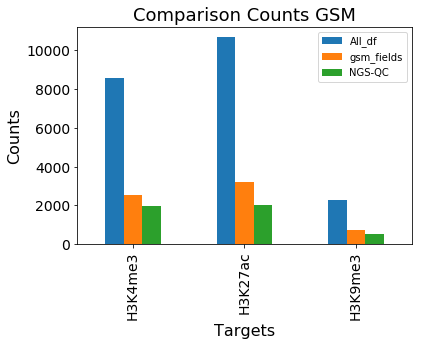

In [45]:
#GSM graphs
fig1 = gsm_targets_counts.plot(x= 'Targets', kind='bar', )
plt.title('Comparison Counts GSM', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Targets", fontsize=16)
plt.ylabel("Counts", fontsize=16)

plt.show()

#We have a superestimation when we used a general table (all fields from R package)
#This is occured becausae the target's term is inserted on description of GSE. However, the GSE englobes a lot of GSM, 
#and not all gsm of this respective gse is related with this target!!!


#It's more safety looking for targets from GSM fields

#We retrieved more GSM compared with NGS-QC for all targets (I will find a mode to get the table from NGS-QC 
#and make a venn diagram)

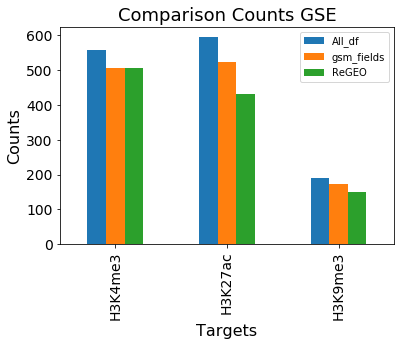

In [46]:
#GSE graphs
gse_targets_counts.plot(x= 'Targets', kind='bar', )
plt.title('Comparison Counts GSE', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Targets", fontsize=16)
plt.ylabel("Counts", fontsize=16)
plt.show()

#Same case above. When we get the general table, we superestimated the counts
#For H3K4me3, the number of GSE is equal compared with our table (gsm fields)


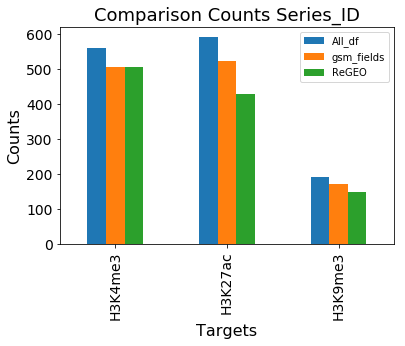

In [47]:
#GSE Series_ID graphs
series_id_targets_counts.plot(x= 'Targets', kind='bar', )
plt.title('Comparison Counts Series_ID', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Targets", fontsize=16)
plt.ylabel("Counts", fontsize=16)
plt.show()


#the counts were very similar between gse (gse table from R package - SQL) and series_id (gsm fields)

# Venn GSE (Geometadb x ReGEO)
probabily, the best way to compare with ReGEO is mantain the search including summary and overall_designs besides
gsm fields

In [58]:
#loading h3k4me3 GSE results from ReGEO - in this case (GSE) the all targets are in almost all cases, described in this columns above
gse_regeo_h3k4me3 = pd.read_csv('regeo_h3k4me3.csv', sep=',')
gse_regeo_h3k4me3

,series_number,title,experiment_type,organism,disease,timepoints
0,GSE74439,The pentose phosphate pathway regulates the ci...,Expression profiling by high throughput sequen...,Homo sapiens,NaN,12
1,GSE94023,MCF7 breast cancer cell response to estradiol,Genome binding/occupancy profiling by high thr...,Homo sapiens,thrombocytopenia-absent radius syndrome;breast...,10
2,GSE41352,Integrated analysis of transcript level regula...,Expression profiling by array,Homo sapiens,NaN,7
3,GSE97989,5hmC dynamically correlated with enhancer's ac...,Genome binding/occupancy profiling by high thr...,Homo sapiens,thrombocytopenia-absent radius syndrome;congen...,5
4,GSE97988,5hmC dynamically correlated with enhancer's ac...,Methylation profiling by high throughput seque...,Homo sapiens,thrombocytopenia-absent radius syndrome;congen...,5
5,GSE100257,ChIP-seq for histone modifications during MCF1...,Genome binding/occupancy profiling by high thr...,Homo sapiens,NaN,5
6,GSE97990,5hmC dynamically correlated with enhancer's ac...,Expression profiling by high throughput sequen...,Homo sapiens,arthritis,5
7,GSE42475,Defining a molecular roadmap of cellular repro...,Non-coding RNA profiling by array,Homo sapiens;Human alphaherpesvirus 1;Human al...,NaN,4
8,GSE57637,Neurotrophic Tyrosine Kinase Receptor 1 is Epi...,Expression profiling by high throughput sequen...,Homo sapiens,eosinophilic esophagitis;esophagitis;atopic de...,3
9,GSE25346,Agilent expression analysis of LNCaP cells fol...,Expression profiling by array,Homo sapiens,cancer;prostate cancer;carcinoma,3


In [59]:
##get the GSE list from geometadb and ReGEO for h3K4me3
#ReGEo table

list_gse_regeo_h3k4me3 = gse_regeo_h3k4me3['series_number'].tolist()
set_regeo_h3k4me3 = set(list_gse_regeo_h3k4me3)
print(len(set_regeo_h3k4me3))

506


In [60]:
##get the GSE list from geometadb and ReGEO for h3K4me3 
#Geometadb table

list_gse_geometadb_h3k4me3 = df_h3k4me3_test_just_gsm_no_dup['gse'].tolist()
set_geomdb_h3k4me3 = set(list_gse_geometadb_h3k4me3)
print(len(set_geomdb_h3k4me3))
#unique gse values

505


In [61]:
from matplotlib_venn import venn2


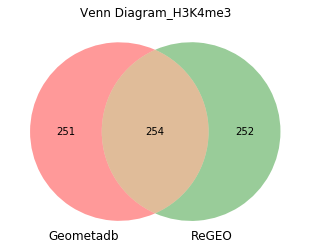

In [62]:
#H3K4me3
venn_gse_h3k4me3 = venn2([set_geomdb_h3k4me3, set_regeo_h3k4me3], set_labels = ('Geometadb', 'ReGEO'))
plt.title('Venn Diagram_H3K4me3')
plt.show()
                          

In [63]:
#getting the intersection
intersection_h3k4me3 = set_geomdb_h3k4me3.intersection(set_regeo_h3k4me3)
print(len(intersection_h3k4me3))

intersection_h3k4me3

254


{'GSE100009',
 'GSE100040',
 'GSE100257',
 'GSE100347',
 'GSE102395',
 'GSE102638',
 'GSE102728',
 'GSE102804',
 'GSE102932',
 'GSE103309',
 'GSE103331',
 'GSE103449',
 'GSE103602',
 'GSE104481',
 'GSE106914',
 'GSE107176',
 'GSE107609',
 'GSE107851',
 'GSE107929',
 'GSE108265',
 'GSE108323',
 'GSE108830',
 'GSE109377',
 'GSE109575',
 'GSE109721',
 'GSE110631',
 'GSE111000',
 'GSE111873',
 'GSE112655',
 'GSE113361',
 'GSE113816',
 'GSE114703',
 'GSE115940',
 'GSE13084',
 'GSE13313',
 'GSE14092',
 'GSE15690',
 'GSE18046',
 'GSE20040',
 'GSE20303',
 'GSE20725',
 'GSE21442',
 'GSE23080',
 'GSE23455',
 'GSE23701',
 'GSE23784',
 'GSE24447',
 'GSE25126',
 'GSE25882',
 'GSE26137',
 'GSE26320',
 'GSE29118',
 'GSE29422',
 'GSE31204',
 'GSE31417',
 'GSE31755',
 'GSE33633',
 'GSE33930',
 'GSE34260',
 'GSE35375',
 'GSE35462',
 'GSE35573',
 'GSE36616',
 'GSE36620',
 'GSE37377',
 'GSE37378',
 'GSE38338',
 'GSE38403',
 'GSE38442',
 'GSE38682',
 'GSE38861',
 'GSE39068',
 'GSE39538',
 'GSE40867',
 'GSE

In [64]:
diff_geomdb_regeo_gse_h3k4me3 = set_geomdb_h3k4me3 - set_regeo_h3k4me3
print(len(diff_geomdb_regeo_gse_h3k4me3))
diff_geomdb_regeo_gse_h3k4me3

251


{'GSE100381',
 'GSE100400',
 'GSE100993',
 'GSE101028',
 'GSE101033',
 'GSE101073',
 'GSE101120',
 'GSE101154',
 'GSE101188',
 'GSE101237',
 'GSE101244',
 'GSE101250',
 'GSE101271',
 'GSE101278',
 'GSE101281',
 'GSE101346',
 'GSE101351',
 'GSE101354',
 'GSE101357',
 'GSE101370',
 'GSE101371',
 'GSE101385',
 'GSE101646',
 'GSE101853',
 'GSE101966',
 'GSE101974',
 'GSE102004',
 'GSE102616',
 'GSE102684',
 'GSE103187',
 'GSE103396',
 'GSE103543',
 'GSE103728',
 'GSE104888',
 'GSE104983',
 'GSE105028',
 'GSE105660',
 'GSE106624',
 'GSE106870',
 'GSE107221',
 'GSE107553',
 'GSE108025',
 'GSE108506',
 'GSE108586',
 'GSE109625',
 'GSE109695',
 'GSE110028',
 'GSE110133',
 'GSE110354',
 'GSE111179',
 'GSE113040',
 'GSE113191',
 'GSE113824',
 'GSE114392',
 'GSE114737',
 'GSE115047',
 'GSE115822',
 'GSE115845',
 'GSE115923',
 'GSE117889',
 'GSE118033',
 'GSE118588',
 'GSE118589',
 'GSE119081',
 'GSE119555',
 'GSE119997',
 'GSE16256',
 'GSE16368',
 'GSE16657',
 'GSE17312',
 'GSE18927',
 'GSE19465'

In [65]:
diff_regeo_geomdb_gse_h3k4me3 = set_regeo_h3k4me3 - set_geomdb_h3k4me3
print(len(diff_regeo_geomdb_gse_h3k4me3))
diff_regeo_geomdb_gse_h3k4me3

252


{'GSE100398',
 'GSE100439',
 'GSE100485',
 'GSE100832',
 'GSE101571',
 'GSE102101',
 'GSE102209',
 'GSE102584',
 'GSE104059',
 'GSE104289',
 'GSE104545',
 'GSE104570',
 'GSE105022',
 'GSE105258',
 'GSE10635',
 'GSE107029',
 'GSE107031',
 'GSE107032',
 'GSE107599',
 'GSE107600',
 'GSE107927',
 'GSE108502',
 'GSE10917',
 'GSE109619',
 'GSE110630',
 'GSE110632',
 'GSE110633',
 'GSE110634',
 'GSE110635',
 'GSE110636',
 'GSE111263',
 'GSE112021',
 'GSE112142',
 'GSE112633',
 'GSE112654',
 'GSE112656',
 'GSE112657',
 'GSE116310',
 'GSE116769',
 'GSE117200',
 'GSE117341',
 'GSE119021',
 'GSE12431',
 'GSE12616',
 'GSE12646',
 'GSE13412',
 'GSE14083',
 'GSE14422',
 'GSE14436',
 'GSE15701',
 'GSE16730',
 'GSE17053',
 'GSE17216',
 'GSE18292',
 'GSE18499',
 'GSE19619',
 'GSE19910',
 'GSE20019',
 'GSE20563',
 'GSE20673',
 'GSE20753',
 'GSE21141',
 'GSE21172',
 'GSE23402',
 'GSE24111',
 'GSE24459',
 'GSE25346',
 'GSE26040',
 'GSE26427',
 'GSE26540',
 'GSE26831',
 'GSE26988',
 'GSE27051',
 'GSE27616'

In [66]:
#Check if the GSE only in Regeo will be in geometadb
df_h3k4me3_test_just_gsm_no_dup[df_h3k4me3_test_just_gsm_no_dup["gse"].str.contains("GSE100398", case=False)]


#I did several searchs and none of these GSE of ReGEO are in geometadb - chek if this GSE is indeed related to 
#h3k4me3 investigations

,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse


In [67]:
#Check if the GSE only in GEOmetadb will be in ReGEO table
gse_regeo_h3k4me3[gse_regeo_h3k4me3["series_number"].str.contains("GSE100381", case=False)]

#however, this GSE is included in regeo database. If we looking for this series, it will be there, including GSM
#with h3k4me3 target, but it dont`t into in regeo search by h3k4me3 

,series_number,title,experiment_type,organism,disease,timepoints


In [68]:
df1[df1["gse"].str.contains("GSE100398", case=False)]

#To confirm that GSE100398 is not inserted in our general table.
#despite this GSE has the term H3K4me3 in its summary, the experiment is not related with its investigation,
#and the experiment is not related to ChipSeq (the target was ING5).


,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2


In [69]:
#Let's check others....
df1[df1["gse"].str.contains("GSE104570", case=False)]


,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2


In [70]:
#Let's check others....
df1[df1["gse"].str.contains("GSE71955", case=False)]

#it is here
#Let's check in h3k4me3 table

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
18499,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847992,gDNA_CD4_Control_rep1,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 54;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18500,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847993,gDNA_CD4_Control_rep2,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 37;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18501,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847994,gDNA_CD4_Control_rep3,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 38;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18502,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847995,gDNA_CD4_Control_rep4,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 49;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18503,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847996,gDNA_CD4_Control_rep5,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 37;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18504,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847997,gDNA_CD4_Control_rep6,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 51;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18505,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847998,gDNA_CD4_Control_rep7,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 37;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18506,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847999,gDNA_CD4_Control_rep8,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Male;\tage: 46;\tcell ...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18507,GSE71955,Methylation p

In [71]:
#it's not appear in the table H3K4me3
df_h3k4me3_test_just_gsm_no_dup[df_h3k4me3_test_just_gsm_no_dup["gse"].str.contains("GSE71955", case=False)]

#what is happen? - check

,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse


# Check the gse quantitative / qualitative data from general table
Including summary and overall_design from original table 

In [72]:
#for h3k4me3
df_h3k4me3_no_dup[df_h3k4me3_no_dup['gse'].str.contains("GSE71955", case=False)]

#some GSE found by ReGEO and not inserted in 'gms fields' from geometadb

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2
18499,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847992,gDNA_CD4_Control_rep1,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 54;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18500,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847993,gDNA_CD4_Control_rep2,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 37;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18501,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847994,gDNA_CD4_Control_rep3,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 38;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18502,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847995,gDNA_CD4_Control_rep4,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 49;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18503,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847996,gDNA_CD4_Control_rep5,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 37;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18504,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847997,gDNA_CD4_Control_rep6,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 51;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18505,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847998,gDNA_CD4_Control_rep7,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Female;\tage: 37;\tcel...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18506,GSE71955,Methylation profiling by genome tiling array,Epigenetic profiling in CD4 and CD8 T cells fr...,"In Graves’ disease (GD), a combination of gene...",Individuals were recruited from the Estonian G...,Public on Nov 06 2015,26459776.0,GSM1847999,gDNA_CD4_Control_rep8,genomic,GPL13534,Homo sapiens,"GSE71955,GSE71957","Genomic DNA, CD4 cells, healthy control",tissue: blood;\tgender: Male;\tage: 46;\tcell ...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1847...,NaN
18507,GSE71955,Methylation p

In [73]:
#using this table no dup because the checked id is in series_id
df_h3k4me3_no_dup['gse'].nunique()

558

Venn diagram with these data

In [74]:
#get the column to list and to set

list_gse_summ_and_OD_h3k4me3 = df_h3k4me3_no_dup['gse'].tolist()
set_gse_summ_and_OD_h3k4me3  = set(list_gse_summ_and_OD_h3k4me3)
print(len(set_gse_summ_and_OD_h3k4me3 ))




558


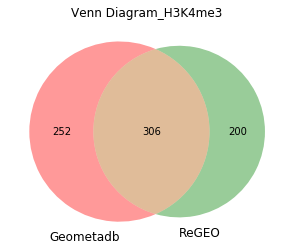

In [75]:
#new venn - more realistic to GSE case. Remember: for GSM, it's better work with gsm fields

#H3K4me3
venn_gse_h3k4me3 = venn2([set_gse_summ_and_OD_h3k4me3, set_regeo_h3k4me3], set_labels = ('Geometadb', 'ReGEO'))
plt.title('Venn Diagram_H3K4me3')
plt.show()

#we have a improvement in intersection
#the all 52 gse that was not included before, now are in intersection (they are included in ReGEo result)

In [76]:
#not contain because this GSE is related to RNA-Seq
df1[df1['gse'].str.contains("GSE100398", case=False)]

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2


In [77]:
#252 gse included in geometadb and not included in ReGEO
diff_geomdb_allfields_regeo = set_gse_summ_and_OD_h3k4me3 - set_regeo_h3k4me3
diff_geomdb_allfields_regeo

{'GSE100381',
 'GSE100400',
 'GSE100993',
 'GSE101028',
 'GSE101033',
 'GSE101073',
 'GSE101120',
 'GSE101154',
 'GSE101188',
 'GSE101237',
 'GSE101244',
 'GSE101250',
 'GSE101271',
 'GSE101278',
 'GSE101281',
 'GSE101346',
 'GSE101351',
 'GSE101354',
 'GSE101357',
 'GSE101370',
 'GSE101371',
 'GSE101385',
 'GSE101646',
 'GSE101853',
 'GSE101966',
 'GSE101974',
 'GSE102004',
 'GSE102616',
 'GSE102684',
 'GSE103187',
 'GSE103396',
 'GSE103543',
 'GSE103728',
 'GSE104888',
 'GSE104983',
 'GSE105028',
 'GSE105660',
 'GSE106624',
 'GSE106870',
 'GSE107221',
 'GSE107553',
 'GSE108025',
 'GSE108506',
 'GSE108586',
 'GSE109625',
 'GSE109695',
 'GSE110028',
 'GSE110133',
 'GSE110354',
 'GSE111179',
 'GSE113040',
 'GSE113191',
 'GSE113824',
 'GSE114392',
 'GSE114737',
 'GSE115047',
 'GSE115822',
 'GSE115845',
 'GSE115923',
 'GSE117889',
 'GSE118033',
 'GSE118588',
 'GSE118589',
 'GSE119081',
 'GSE119555',
 'GSE119997',
 'GSE16256',
 'GSE16368',
 'GSE16657',
 'GSE17312',
 'GSE18927',
 'GSE19465'

In [78]:
#200 gse included in ReGeo and not in geometadb
diff_regeo_geomdb_allfields = set_regeo_h3k4me3 - set_gse_summ_and_OD_h3k4me3
diff_regeo_geomdb_allfields

{'GSE100398',
 'GSE100439',
 'GSE100485',
 'GSE100832',
 'GSE101571',
 'GSE102101',
 'GSE102584',
 'GSE104059',
 'GSE104289',
 'GSE104570',
 'GSE105022',
 'GSE105258',
 'GSE10635',
 'GSE107029',
 'GSE107031',
 'GSE107032',
 'GSE107599',
 'GSE107600',
 'GSE108502',
 'GSE10917',
 'GSE109619',
 'GSE110630',
 'GSE110632',
 'GSE110633',
 'GSE110634',
 'GSE110635',
 'GSE110636',
 'GSE111263',
 'GSE112021',
 'GSE112633',
 'GSE112654',
 'GSE112656',
 'GSE112657',
 'GSE116769',
 'GSE119021',
 'GSE12431',
 'GSE12616',
 'GSE12646',
 'GSE13412',
 'GSE14083',
 'GSE14422',
 'GSE14436',
 'GSE15701',
 'GSE16730',
 'GSE17053',
 'GSE17216',
 'GSE18499',
 'GSE19619',
 'GSE19910',
 'GSE20019',
 'GSE20563',
 'GSE20673',
 'GSE20753',
 'GSE21141',
 'GSE21172',
 'GSE23402',
 'GSE24111',
 'GSE24459',
 'GSE25346',
 'GSE26040',
 'GSE26427',
 'GSE26540',
 'GSE26988',
 'GSE27051',
 'GSE27616',
 'GSE27617',
 'GSE27619',
 'GSE28323',
 'GSE28332',
 'GSE28874',
 'GSE29130',
 'GSE29155',
 'GSE30134',
 'GSE31909',
 'GSE

In [79]:
#This GSE that appears in GEO metadb is related to homo sapiens and h3k4me3, and was not included in the ReGEO
#results...however, this series are included in ReGEO...
gse_regeo_h3k4me3[gse_regeo_h3k4me3['series_number'].str.contains('GSE54856', case=False)]

,series_number,title,experiment_type,organism,disease,timepoints


# Venn diagram ReGeo H3k27ac - gse from summary and overall design

In [80]:
df_h3k27ac_drop_dup['gse'].nunique()

594

In [81]:
#loading h3k27ac GSE results from ReGEO 
gse_regeo_h3k27ac = pd.read_csv('regeo_h3k27ac.csv', sep=',')
gse_regeo_h3k27ac

,series_number,title,experiment_type,organism,disease,timepoints
0,GSE100099,p53 pulses lead to distinct patterns of gene e...,Expression profiling by high throughput sequen...,Homo sapiens,migraine;thrombocytopenia-absent radius syndro...,16
1,GSE58177,Targeted H3R26 deimination specifically facili...,Genome binding/occupancy profiling by high thr...,Homo sapiens,breast cancer,6
2,GSE54471,Developmental Competence Encoded at the Level ...,Genome binding/occupancy profiling by high thr...,Homo sapiens,cancer;eating disorder,5
3,GSE97990,5hmC dynamically correlated with enhancer's ac...,Expression profiling by high throughput sequen...,Homo sapiens,arthritis,5
4,GSE97988,5hmC dynamically correlated with enhancer's ac...,Methylation profiling by high throughput seque...,Homo sapiens,thrombocytopenia-absent radius syndrome;congen...,5
5,GSE100257,ChIP-seq for histone modifications during MCF1...,Genome binding/occupancy profiling by high thr...,Homo sapiens,NaN,5
6,GSE97989,5hmC dynamically correlated with enhancer's ac...,Genome binding/occupancy profiling by high thr...,Homo sapiens,thrombocytopenia-absent radius syndrome;congen...,5
7,GSE93905,Characterization of Dopaminergic Neurons Deriv...,Genome binding/occupancy profiling by high thr...,Homo sapiens,NaN,4
8,GSE109625,Dynamic and integrated transcriptional code or...,Expression profiling by high throughput sequen...,Homo sapiens,Parkinson's disease;thrombocytopenia-absent ra...,4
9,GSE41166,A dynamic H3K27ac signature defines VEGF-regul...,Genome binding/occupancy profiling by high thr...,Homo sapiens,eating disorder;allergic hypersensitivity dise...,4


In [82]:
#set our list
list_gse_summ_and_OD_h3k27ac = df_h3k27ac_drop_dup['gse'].tolist()
set_gse_summ_and_OD_h3k27ac  = set(list_gse_summ_and_OD_h3k27ac)
print(len(set_gse_summ_and_OD_h3k27ac))


594


In [83]:
#set regeo list
list_gse_regeo_h3k27ac = gse_regeo_h3k27ac['series_number'].tolist()
set_gse_regeo_h3k27ac = set(list_gse_regeo_h3k27ac)
print(len(set_gse_regeo_h3k27ac))

431


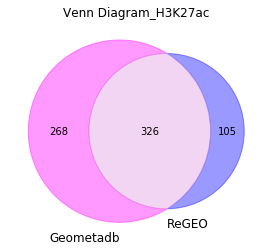

In [84]:
#venn

#H3K27ac
venn_gse_h3k27ac = venn2([set_gse_summ_and_OD_h3k27ac, set_gse_regeo_h3k27ac], set_labels = ('Geometadb', 'ReGEO'))
venn_gse_h3k27ac.get_patch_by_id('10').set_color('magenta')
venn_gse_h3k27ac.get_patch_by_id('01').set_color('blue')
venn_gse_h3k27ac.get_patch_by_id('11').set_color('#e098e1')
plt.title('Venn Diagram_H3K27ac')
plt.show()


In [85]:
#268 gse included in geometadb and not included in ReGEO
dif_h3k27ac_geomdb_allfields_regeo = set_gse_summ_and_OD_h3k27ac - set_gse_regeo_h3k27ac
dif_h3k27ac_geomdb_allfields_regeo

{'GSE100381',
 'GSE100889',
 'GSE100978',
 'GSE100994',
 'GSE100995',
 'GSE101019',
 'GSE101022',
 'GSE101031',
 'GSE101034',
 'GSE101065',
 'GSE101068',
 'GSE101136',
 'GSE101160',
 'GSE101230',
 'GSE101231',
 'GSE101253',
 'GSE101258',
 'GSE101261',
 'GSE101265',
 'GSE101269',
 'GSE101273',
 'GSE101324',
 'GSE101345',
 'GSE101367',
 'GSE101384',
 'GSE101646',
 'GSE102684',
 'GSE102796',
 'GSE102804',
 'GSE103187',
 'GSE104227',
 'GSE104282',
 'GSE104545',
 'GSE104888',
 'GSE104921',
 'GSE104983',
 'GSE105105',
 'GSE105106',
 'GSE105937',
 'GSE106146',
 'GSE106433',
 'GSE106559',
 'GSE106666',
 'GSE107013',
 'GSE107126',
 'GSE107147',
 'GSE107553',
 'GSE107706',
 'GSE107738',
 'GSE107780',
 'GSE107785',
 'GSE108025',
 'GSE108506',
 'GSE108518',
 'GSE108586',
 'GSE108587',
 'GSE109229',
 'GSE109340',
 'GSE109591',
 'GSE109695',
 'GSE109791',
 'GSE109891',
 'GSE110453',
 'GSE110655',
 'GSE111179',
 'GSE112074',
 'GSE112328',
 'GSE112336',
 'GSE112729',
 'GSE113040',
 'GSE113092',
 'GSE1

In [86]:
#check in regeo table

gse_regeo_h3k27ac[gse_regeo_h3k27ac['series_number'].str.contains('GSE41009', case=False)]


,series_number,title,experiment_type,organism,disease,timepoints


In [87]:
#105 gse included in ReGeo and not included in Geometadb
dif_h3k27ac_regeo_geomdb = set_gse_regeo_h3k27ac - set_gse_summ_and_OD_h3k27ac
dif_h3k27ac_regeo_geomdb

{'GSE100694',
 'GSE100796',
 'GSE101389',
 'GSE101498',
 'GSE102101',
 'GSE102584',
 'GSE104001',
 'GSE104059',
 'GSE106939',
 'GSE107196',
 'GSE107599',
 'GSE107600',
 'GSE108976',
 'GSE110630',
 'GSE110632',
 'GSE110633',
 'GSE110634',
 'GSE110635',
 'GSE110636',
 'GSE112021',
 'GSE112344',
 'GSE112654',
 'GSE112656',
 'GSE112657',
 'GSE114385',
 'GSE117409',
 'GSE118514',
 'GSE119021',
 'GSE14083',
 'GSE24459',
 'GSE27627',
 'GSE28874',
 'GSE30173',
 'GSE33281',
 'GSE36131',
 'GSE38563',
 'GSE51272',
 'GSE51660',
 'GSE51800',
 'GSE52510',
 'GSE52617',
 'GSE55922',
 'GSE56381',
 'GSE56382',
 'GSE57354',
 'GSE59395',
 'GSE61852',
 'GSE62742',
 'GSE65319',
 'GSE66023',
 'GSE66031',
 'GSE66117',
 'GSE66121',
 'GSE68075',
 'GSE68401',
 'GSE69106',
 'GSE69905',
 'GSE69919',
 'GSE70460',
 'GSE70678',
 'GSE70734',
 'GSE70751',
 'GSE70971',
 'GSE71325',
 'GSE71326',
 'GSE71503',
 'GSE71505',
 'GSE71615',
 'GSE72175',
 'GSE72483',
 'GSE72714',
 'GSE74230',
 'GSE74308',
 'GSE75286',
 'GSE76465

In [88]:
#check a sample that is chipseq and our target, but their series in not included in geometadb
df_h3k27ac_drop_dup[df_h3k27ac_drop_dup["gse"].str.contains("GSM772829", case=False)]

#this sample is not for homo sapiens. is pan troglodytes

,gse,type,title,summary,overall_design,status,pubmed_id,gsm,title..9,type..10,gpl,organism_ch1,series_id,source_name_ch1,characteristics_ch1,supplementary_file,characteristics_ch2


# ReGEO database

In [89]:
regeo = pd.read_csv('ReGEODb_20181112 (original).csv', sep=',')

In [90]:
regeo.head()

,gse,title,super_series,pubmed_id,experiment_type,contributor,contact_name,contact_email,contact_institute,contact_country,...,doid_termname,doid_isleaf,doid_distancefromroot,doid_isobsolete,curator,condition_subject,submission_date,last_update_date,organism_id,timepoint_count
0,GSE1,NHGRI_Melanoma_class,NaN,10952317,Expression profiling by array,None,Michael Bittner,mbittner@nhgri.nih.gov,"NHGRI, NIH",USA,...,NaN,NaN,NaN,NaN,NaN,NaN,1/22/01,2/23/12,NaN,0
1,GSE10,eye-SAGE,NaN,11756676,Expression profiling by SAGE,"Dror,,Sharon; Seth Blackshaw; Constance,L,Cepk...",Dror Sharon,dror_sharon@meei.harvard.edu,Massachusetts Eye and Ear,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,10/3/01,4/18/12,NaN,0
2,GSE100,zzMex67 co-IPed RNA vs. Total RNA (zzMex67IP_...,NaN,12524544,Expression profiling by array,"Haley,,Hieronymus; Pamela,A,Silver",Haley Hieronymus,hierony@fas.harvard.edu,Harvard Medical School and Dana-Farber Cancer ...,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,11/25/02,2/23/12,NaN,0
3,GSE1000,Osteosarcoma TE85 cell tissue culture study,NaN,NaN,Expression profiling by array,"Catherine,M,Klapperich; Jie Song; Carolyn,R,Be...",Catherine Klapperich,catherin@bu.edu,Boston University,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,1/27/04,4/17/13,NaN,0
4,GSE10000,Age-dependent aorta transcriptomes in wild-typ...,NaN,19139167,Expression profiling by array,"Rolf,,Graebner; Sandra Doepping; Markus Hildne...","Andreas,Johann Richard,Habenicht",andreas.habenicht@mti.uni-jena.de,Vascular Medicine,Germany,...,NaN,NaN,NaN,NaN,NaN,NaN,12/21/07,5/22/13,NaN,3


In [91]:
#No GSM information
regeo.columns

Index(['gse', 'title', 'super_series', 'pubmed_id', 'experiment_type',
       'contributor', 'contact_name', 'contact_email', 'contact_institute',
       'contact_country', 'organism', 'summary', 'overall_design',
       'organism_synonym', 'platform_id', 'timepoint_numbers', 'cl_termids',
       'cl_termname', 'cl_isleaf', 'cl_distancefromroot', 'cl_isobsolete',
       'doid_termids', 'doid_termname', 'doid_isleaf', 'doid_distancefromroot',
       'doid_isobsolete', 'curator', 'condition_subject', 'submission_date',
       'last_update_date', 'organism_id', 'timepoint_count'],
      dtype='object')

# J-F table NGS-QC

In [97]:
df_ngs_qc_JF = pd.read_csv('filtered_table_ngsqc_JF.csv', sep=',', header= None, names=range(17))
df_ngs_qc_JF

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,GSM651557,GSE26501,21795385.0,Homo sapiens,MNase-seq,MNase-seq,5079877 (100.00),DDD,0.001,62.043,0.002,134.029,0.106,7.353,Illumina Genome Analyzer,2011-01-07,NaN
1,GSM651559,GSE26501,21795385.0,Homo sapiens,MNase-seq,MNase-seq,5951601 (100.00),DDD,0.005,59.988,0.015,76.19,0.28600000000000003,6.696000000000001,Illumina Genome Analyzer,2011-01-07,NaN
2,GSM651559,GSE26501,21795385.0,Homo sapiens,MNase-seq,MNase-seq,5261086 (100.00),DDD,0.003,46.67,0.006999999999999999,87.146,0.18,6.6979999999999995,Illumina Genome Analyzer,2011-01-07,NaN
3,GSM651557,GSE26501,21795385.0,Homo sapiens,MNase-seq,MNase-seq,4866730 (100.00),DDD,0.001,61.739,0.002,145.54,0.11199999999999999,7.305,Illumina Genome Analyzer,2011-01-07,NaN
4,GSM392705,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,3034085 (96.21),DDD,0.011000000000000001,49.063,0.04,36.605,0.39,5.941,Illumina Genome Analyzer,2009-04-15
5,GSM392711,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,3758332 (89.84),DDD,0.052000000000000005,28.21,0.29,10.32,1.379,3.049,Illumina Genome Analyzer,2009-04-15
6,GSM392713,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,1327595 (95.91),DDD,0.001,14.3,0.004,9.308,0.016,4.312,Illumina Genome Analyzer,2009-04-15
7,GSM392708,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,4227125 (94.50),DDD,0.028999999999999998,53.088,0.16699999999999998,20.304000000000002,1.061,4.522,Illumina Genome Analyzer,2009-04-15
8,GSM392709,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,1594108 (96.19),DDD,0.003,27.296,0.006999999999999999,44.918,0.096,6.776,Illumina Genome Analyzer,2009-04-15
9,GSM392707,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,3787447 (98.28),DDD,0.002,18.475,0.006,21.318,0.054000000000000006,5.82,Illumina Genome Analyzer,2009-04-15


In [108]:
#convert header in string
df_ngs_qc_JF.columns = df_ngs_qc_JF.columns.map(str)

In [109]:
#all samples are unique
df_ngs_qc_JF['0'].nunique

<bound method IndexOpsMixin.nunique of 0         GSM651557
1         GSM651559
2         GSM651559
3         GSM651557
4         GSM392705
5         GSM392711
6         GSM392713
7         GSM392708
8         GSM392709
9         GSM392707
            ...    
81064    GSM1625902
81065    GSM1936284
81066    GSM1936289
81067    GSM1936272
81068    GSM1625900
81069    GSM1936283
81070    GSM2090075
81071    GSM1936266
81072    GSM1936271
81073    GSM1625897
Name: 0, Length: 81074, dtype: object>

In [110]:
#merge old ngs-qc data with geometadb gms data (no dup)

df1_no_dup_col_targets = df_sel_col_for_targets.drop_duplicates(subset='gsm', keep='first')
df1_no_dup_col_targets



,gsm,title..9,source_name_ch1,characteristics_ch1,series_id,gse
0,GSM263933,CD4+ Tcell Resting M0,"Human CD4+ T cells, resting",Human CD4+ T cells,GSE10437,GSE10437
1,GSM263934,CD4+ Tcell Resting T0,"Human CD4+ T cells, resting",Human CD4+ T cells,GSE10437,GSE10437
2,GSM263935,CD4+ Tcell Activated M18,"Human CD4+ T cells, activated using anti-CD3/2...",Human CD4+ T cells,GSE10437,GSE10437
3,GSM263936,CD4+ Tcell Activated T18,"Human CD4+ T cells, activated using anti-CD3/2...",Human CD4+ T cells,GSE10437,GSE10437
4,GSM300493,Transcriptome of HEK293T cells,HEK293T cells,Human embryonic kidney (HEK293T) cells,GSE11892,GSE11892
5,GSM300494,Transcriptome of B cells,ramos B cells,Ramos B cell line,GSE11892,GSE11892
6,GSM301562,HEK Input DNA rep1,Input DNA,NaN,GSE11892,GSE11892
7,GSM301564,HEK Input DNA rep2,Input DNA,NaN,GSE11892,GSE11892
8,GSM301565,HEK Input DNA rep3,Input DNA,NaN,GSE11892,GSE11892
9,GSM301566,HEK ChIP DNA rep1,Polymerase II ChIP DNA,NaN,GSE11892,GSE11892


In [113]:
#need to rename the first column from ngs-qc to merge the general table with geometadb
df_ngs_qc_JF['gsm'] = df_ngs_qc_JF['0'].rename

df_ngs_qc_JF


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,gsm
0,GSM651557,GSE26501,21795385.0,Homo sapiens,MNase-seq,MNase-seq,5079877 (100.00),DDD,0.001,62.043,0.002,134.029,0.106,7.353,Illumina Genome Analyzer,2011-01-07,NaN,<bound method Series.rename of 0 GSM65...
1,GSM651559,GSE26501,21795385.0,Homo sapiens,MNase-seq,MNase-seq,5951601 (100.00),DDD,0.005,59.988,0.015,76.19,0.28600000000000003,6.696000000000001,Illumina Genome Analyzer,2011-01-07,NaN,<bound method Series.rename of 0 GSM65...
2,GSM651559,GSE26501,21795385.0,Homo sapiens,MNase-seq,MNase-seq,5261086 (100.00),DDD,0.003,46.67,0.006999999999999999,87.146,0.18,6.6979999999999995,Illumina Genome Analyzer,2011-01-07,NaN,<bound method Series.rename of 0 GSM65...
3,GSM651557,GSE26501,21795385.0,Homo sapiens,MNase-seq,MNase-seq,4866730 (100.00),DDD,0.001,61.739,0.002,145.54,0.11199999999999999,7.305,Illumina Genome Analyzer,2011-01-07,NaN,<bound method Series.rename of 0 GSM65...
4,GSM392705,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,3034085 (96.21),DDD,0.011000000000000001,49.063,0.04,36.605,0.39,5.941,Illumina Genome Analyzer,2009-04-15,<bound method Series.rename of 0 GSM65...
5,GSM392711,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,3758332 (89.84),DDD,0.052000000000000005,28.21,0.29,10.32,1.379,3.049,Illumina Genome Analyzer,2009-04-15,<bound method Series.rename of 0 GSM65...
6,GSM392713,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,1327595 (95.91),DDD,0.001,14.3,0.004,9.308,0.016,4.312,Illumina Genome Analyzer,2009-04-15,<bound method Series.rename of 0 GSM65...
7,GSM392708,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,4227125 (94.50),DDD,0.028999999999999998,53.088,0.16699999999999998,20.304000000000002,1.061,4.522,Illumina Genome Analyzer,2009-04-15,<bound method Series.rename of 0 GSM65...
8,GSM392709,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,1594108 (96.19),DDD,0.003,27.296,0.006999999999999999,44.918,0.096,6.776,Illumina Genome Analyzer,2009-04-15,<bound method Series.rename of 0 GSM65...
9,GSM392707,GSE15594,GSE15690,19525931.0,Homo sapiens,MNase-seq,MNase-seq,3787447 (98.28),DDD,0.002,18.475,0.006,21.318,0.054000000000000006,5.82,Illumina Genome Analyzer,2009-04-15,<bound method Series.rename of 0 GSM65...


# JF_Code_NGS-QC improved

In [160]:
import pandas as pd
import numpy as np
import requests
import urllib.request
import lxml.html as lh
from bs4 import BeautifulSoup

In [168]:
#create a config file
from requests import Request, Session

pages=3

uid='Q3FjNlBxMnFtZFkydFU0QzZWM3RFKy9BTjFoQzdkOGR0NWNJd2lBKzI2Ujc5SjNlNFV0SVRLVFpSc3NDcy85cHRtTnFNVCtEUkZ4U1JkN1FPeU9mWTRHVE9Ta0xaS1BaOEdCcHdlQlo4UWg2MlNMMmlrN25KSW5hM3NsTXJWS2cyb1p6R0xIR2JNRU9KeS82eWJzTStHbTBubjErbWx2TDNnOEN6bWFlMmd4cTF2SVh6bkt6MEZtOWtab1pOcEdlaGZZbXJnajFvS1prUElvNnl5Ty9QQT09'
cookies='ngsqccertdb=true; _ga=GA1.2.1785052463.1578075153; _gid=GA1.2.988624427.1578075153; PHPSESSID=5a908e5859bbb665c179b2af70136d2b; _gat=1; UID=15e0f85a8b4ca4; SERVERID94996=13203|Xg+Fq|Xg+Fe; acopendivids=div_guideline_banner; acgroupswithpersist=pets'

for page in range(1,pages+1):
    print("Getting page", str(page))
    s = Session()
    headers= {'Content-type': 'application/x-www-form-urlencoded; charset=UTF-8', 
              'Accept': '*/*', 
              'Accept-Encoding': 'gzip, deflate', 
              'Accept-Language': 'en-GB,en-US;q=0.9,en;q=0.8', 
              'Connection': 'keep-alive', 
              'Content-Length': '314', 
              'Cookie': cookies, 
              'Host': 'www.ngs-qc.org', 
              'Origin': 'http://www.ngs-qc.org', 
              'Referer': 'http://www.ngs-qc.org/results.php', 
              'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) snap Chromium/79.0.3945.79 Chrome/79.0.3945.79 Safari/537.36', 
              'X-Requested-With': 'XMLHttpRequest'}
    payload={'uid': uid, 'order': '0', 'page': str(page)}
    req=Request('POST', 'http://ngs-qc.org/get_page.php', data=payload, headers=headers)
    prepped=req.prepare()
    resp = s.send(prepped)
    resp.text
    #all_html_ngs = "all_html_ngs.html_{}".format(str(page))
    #name="page_{}.html".format(str(page))
    
    with open ("html_ngs.html", "a+") as f:
        f.write(resp.text)

f.close()        

Getting page 1
Getting page 2
Getting page 3


In [176]:
#Headers - the best way is type

headers = ['Public ID', 'Study ID', 'PMID', 'Organism', 'Data type', 'Target molecule', 'TMRs', 
          'QC Stamps', 'QC Reports', 'Local QC Indicators', '2.5 pcdenQC', '2.5 pcQCsim', 
          '5 pcdenQC', '5 pcQCsim', '10 pcdenQC', '10 pcQCsim', 'Seq Plataform', 'Submission Date']

headers 

['Public ID',
 'Study ID',
 'PMID',
 'Organism',
 'Data type',
 'Target molecule',
 'TMRs',
 'QC Stamps',
 'QC Reports',
 'Local QC Indicators',
 '2.5 pcdenQC',
 '2.5 pcQCsim',
 '5 pcdenQC',
 '5 pcQCsim',
 '10 pcdenQC',
 '10 pcQCsim',
 'Seq Plataform',
 'Submission Date']

In [169]:
#Beutifulsoup

import pprint
file = open('html_ngs.html','r') #in this case, it was necessary open the file to apply BeautifulSoup.
soup = BeautifulSoup(file, 'html.parser')

soup



<div style="">
<div class="" style="width:200px;">
<strong> Result(s): 1054</strong>
</div>
<div style="margin-top:0px;">
<span> Sort by:</span>
<select data-rel="chosen" id="sort_field" name="sort_field" size="1" style="width:170px; margin-top:10px;">
<option value="0">Select</option>
<option value="1">Public ID</option><option value="4">Organism</option><option value="5">Data Type</option><option value="6">Target molecule</option><option value="7">TMRs</option><option value="9">QC Stamps</option><option value="10">2.5pc denQC s50</option><option value="11">2.5pc simQC s50/s90</option><option value="12">5pc denQC s50</option><option value="13">5pc simQC s50/s90</option><option value="14">10pc denQC s50</option><option value="15">10pc simQC s50/s90</option><option value="16">Sequencing platform</option><option value="17">Submission date</option> </select>
              
            <button class="btn btn-primary" id="order_button" style="padding:1px; margin-top:1px;" type="button">Go<

In [170]:
#parsing html

all_ngs_list = []

for tables in soup.findAll('table'):
    for tb in tables.findAll('tbody'):
        list_td = []
        for td in tb.findAll('td'):
            
            if 'GSM' in td.text and len(list_td) > 0:
                
                all_ngs_list.append(list_td)
                list_td = list()
                list_td.append(td.text.strip())
               
                continue
            
            list_td.append(td.text.strip()) 
        all_ngs_list.append(list_td)
            
all_ngs_list



                 


[['GSM772860',
  'GSE17312',
  '20944595',
  'Homo sapiens',
  'ChIP-seq',
  'H3K4me1',
  '15494536 (100.00)',
  'CCC',
  '',
  '',
  '0.089',
  '30.510',
  '0.552',
  '9.178',
  '2.420',
  '2.679',
  'Illumina HiSeq 2000',
  '2011-08-03'],
 ['GSM707003',
  'GSE16368',
  '20944595, 25690954',
  'Homo sapiens',
  'ChIP-seq',
  'H3K4me1',
  '37445520 (100.00)',
  'BBB',
  '',
  '',
  '0.291',
  '14.947',
  '1.870',
  '5.192',
  '6.811',
  '1.888',
  'Illumina HiSeq 2000',
  '2011-04-12'],
 ['GSM733761',
  'GSE29611, GSE51334',
  '22955616, 25409831',
  'Homo sapiens',
  'ChIP-seq',
  'H3K4me1',
  '12248462 (96.91)',
  'CCC',
  '',
  '',
  '0.098',
  '35.705',
  '0.633',
  '11.383',
  '3.059',
  '3.006',
  'Illumina Genome Analyzer II',
  '2010-09-16'],
 ['GSM669966',
  'GSE19465',
  '20944595',
  'Homo sapiens',
  'ChIP-seq',
  'H3K4me1',
  '26456603 (100.00)',
  'CBB',
  '',
  '',
  '0.187',
  '30.007',
  '1.502',
  '7.088',
  '6.367',
  '2.350',
  'Illumina Genome Analyzer IIx',
  '201

In [178]:
ngs_df_test = pd.DataFrame(all_ngs_list, columns=['Public ID', 'Study ID', 'PMID', 'Organism', 'Data type', 'Target molecule', 'TMRs', 
          'QC Stamps', 'QC Reports', 'Local QC Indicators', '2.5 pcdenQC', '2.5 pcQCsim', 
          '5 pcdenQC', '5 pcQCsim', '10 pcdenQC', '10 pcQCsim', 'Seq Plataform', 'Submission Date'])
ngs_df_test


,Public ID,Study ID,PMID,Organism,Data type,Target molecule,TMRs,QC Stamps,QC Reports,Local QC Indicators,2.5 pcdenQC,2.5 pcQCsim,5 pcdenQC,5 pcQCsim,10 pcdenQC,10 pcQCsim,Seq Plataform,Submission Date
0,GSM772860,GSE17312,20944595,Homo sapiens,ChIP-seq,H3K4me1,15494536 (100.00),CCC,,,0.089,30.510,0.552,9.178,2.420,2.679,Illumina HiSeq 2000,2011-08-03
1,GSM707003,GSE16368,"20944595, 25690954",Homo sapiens,ChIP-seq,H3K4me1,37445520 (100.00),BBB,,,0.291,14.947,1.870,5.192,6.811,1.888,Illumina HiSeq 2000,2011-04-12
2,GSM733761,"GSE29611, GSE51334","22955616, 25409831",Homo sapiens,ChIP-seq,H3K4me1,12248462 (96.91),CCC,,,0.098,35.705,0.633,11.383,3.059,3.006,Illumina Genome Analyzer II,2010-09-16
3,GSM669966,GSE19465,20944595,Homo sapiens,ChIP-seq,H3K4me1,26456603 (100.00),CBB,,,0.187,30.007,1.502,7.088,6.367,2.350,Illumina Genome Analyzer IIx,2011-02-07
4,GSM773028,GSE17312,20944595,Homo sapiens,ChIP-seq,H3K4me1,38814552 (100.00),BBB,,,0.343,15.772,2.229,5.413,8.359,1.931,Illumina HiSeq 2000,2011-08-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,GSM486707,GSE19465,20944595,Homo sapiens,ChIP-seq,H3K4me1,11179617 (100.00),CCC,,,0.128,25.486,0.786,8.556,3.411,2.534,Illumina Genome Analyzer II,2009-12-16
71,GSM521895,GSE16256,"19829295, 20452322, 20944595, 21289626, 26030523",Homo sapiens,ChIP-seq,H3K4me1,25035690 (100.00),BBB,,,0.416,17.030,2.592,5.051,9.042,1.974,Illumina Genome Analyzer II,2010-03-12
72,GSM646400,"GSE26320, GSE26386",21441907,Homo sapiens,ChIP-seq,H3K4me1,10239391 (94.75),DDD,,,0.036,44.447,0.217,16.000,1.154,3.649,Illumina Genome Analyzer II,2010-12-27
73,GSM669970,GSE19465,20944595,Homo sapiens,ChIP-seq,H3K4me1,39992528 (100.00),BBB,,,0.274,18.696,1.899,6.480,7.819,2.126,Illumina Genome Analyzer IIx,2011-02-07
